In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

## Read Data

In [2]:
data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

### EDA

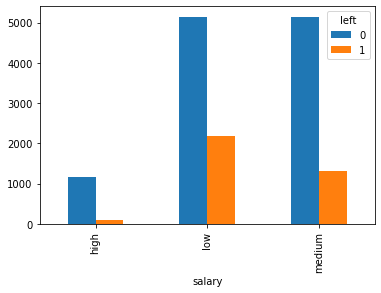

In [4]:
# salary and left
pd.crosstab(data['salary'],data['left']).plot(kind='bar')
plt.show()

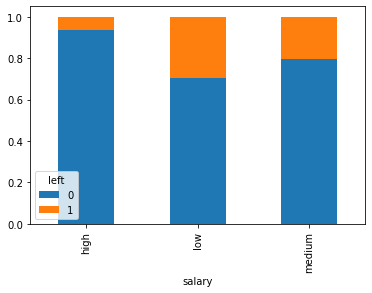

In [5]:
q = pd.crosstab(data['salary'],data['left'])
q.div(q.sum(axis = 1), axis = 0).plot(kind='bar', stacked=True)
plt.show()

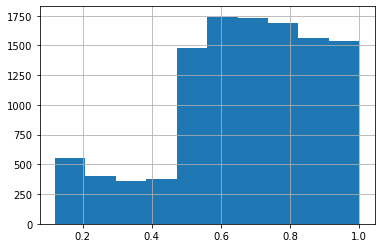

In [6]:
#satisfaction_level and left
data[data['left']==0]['satisfaction_level'].hist()
plt.show()

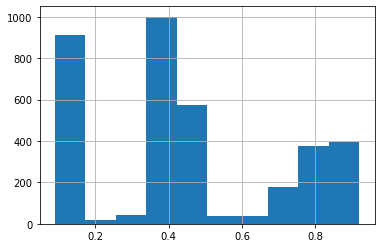

In [7]:
data[data['left']==1]['satisfaction_level'].hist()
plt.show()

# Model Training

In [8]:
y, X = dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)', data, return_type='dataframe')
X_names = X.columns
y, X = y.values.reshape((-1)), X.values
X.shape, y.shape

((14999, 19), (14999,))

In [9]:
model = LogisticRegression(max_iter=10000, fit_intercept=False)
model.fit(X, y)

LogisticRegression(fit_intercept=False, max_iter=10000)

In [10]:
model.predict(X[0:2])

array([1., 0.])

In [11]:
model.predict_proba(X[0:2])

array([[0.47008861, 0.52991139],
       [0.82865611, 0.17134389]])

In [12]:
pd.DataFrame(zip(X_names, np.transpose(model.coef_)))

,0,1
0,Intercept,[-1.5085368828363797]
1,C(sales)[T.RandD],[-0.4817965549252844]
2,C(sales)[T.accounting],[0.10604617295619523]
3,C(sales)[T.hr],[0.3444008144182946]
4,C(sales)[T.management],[-0.38064406327384537]
5,C(sales)[T.marketing],[0.08154387031129123]
6,C(sales)[T.product_mng],[-0.05275821115738694]
7,C(sales)[T.sales],[0.08846015574803219]
8,C(sales)[T.support],[0.1746445393386384]
9,C(sales)[T.technical],[0.1913670779070705]


In [13]:
y_pred = model.predict(X)

In [14]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[10619,   809],
       [ 2303,  1268]], dtype=int64)

In [15]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87     11428
         1.0       0.61      0.36      0.45      3571

    accuracy                           0.79     14999
   macro avg       0.72      0.64      0.66     14999
weighted avg       0.77      0.79      0.77     14999

